## Импорт библиотек и извлечение данных fashion_mnist

In [2]:
import numpy as np
import torch
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
from torch.autograd import Variable
from torch import nn
from IPython.display import clear_output

from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Установка параметров шрифтов

In [12]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'FreeSerif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

## Установка основных параметров и преобразование формата выборок

In [3]:
input_size = X_train.shape[1] * X_train.shape[1]        # Размеры изображения = 28 x 28 = 784
hidden_size = 500      # Количество узлов на скрытом слое
num_classes = len(np.unique(y_train))       # Число классов на выходе. В этом случае от 0 до 9
num_epochs = 5         # Количество тренировок всего набора данных
batch_size = 300       # Размер входных данных для одной итерации
learning_rate = 0.001  # Скорость обучения
max_pixel = np.max(X_train)

X_tensor_train = torch.FloatTensor(X_train)
X_tensor_test = torch.FloatTensor(X_test)
y_tensor_train = torch.LongTensor(y_train)
y_tensor_test = torch.LongTensor(y_test)

### Пример элемента выборки

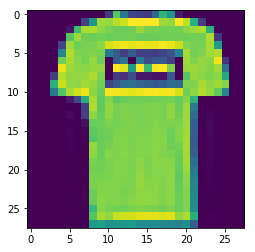

In [4]:
plt.imshow(X_tensor_train[1])
plt.show()

## Подготовка данных и определение нейросети

In [5]:
train_loader = DataLoader(
    dataset = list(zip(X_tensor_train, y_tensor_train),),
    batch_size=batch_size,
    shuffle=True
)
test_loader = DataLoader(
    dataset = list(zip(X_tensor_test, y_tensor_test)),
    batch_size=100,
    shuffle=True
)

Здесь мы строим 2-х слойную нейронную сеть с нелинейным преобразованием ReLU.

In [6]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()                    # Наследуемый родительским классом nn.Module
        self.fc1 = nn.Linear(input_size, hidden_size)  # 1й связанный слой: 784 (данные входа) -> 500 (скрытый узел)
        self.relu = nn.ReLU()                          # Нелинейный слой ReLU max(0,x)
        self.fc2 = nn.Linear(hidden_size, num_classes) # 2й связанный слой: 500 (скрытый узел) -> 10 (класс вывода)
    
    def forward(self, x):                              # Передний пропуск: складывание каждого слоя вместе
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

## Обучение нейросети
#### 2. В процедуру оптимизации нейронной сети вставить код, получающий ошибку на тестовой и контрольной выборках или воспользоваться встроенными процедурами.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


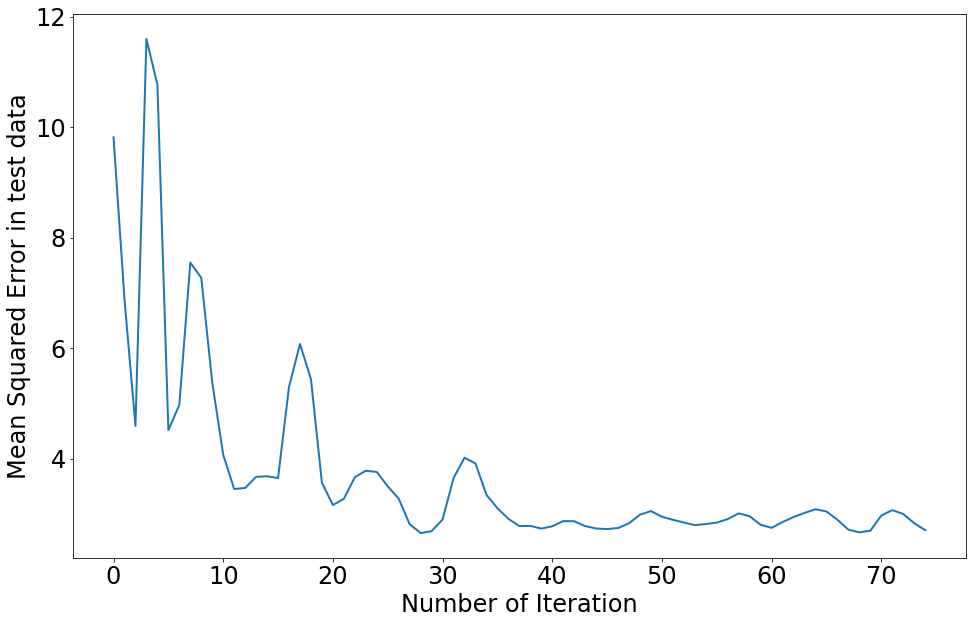

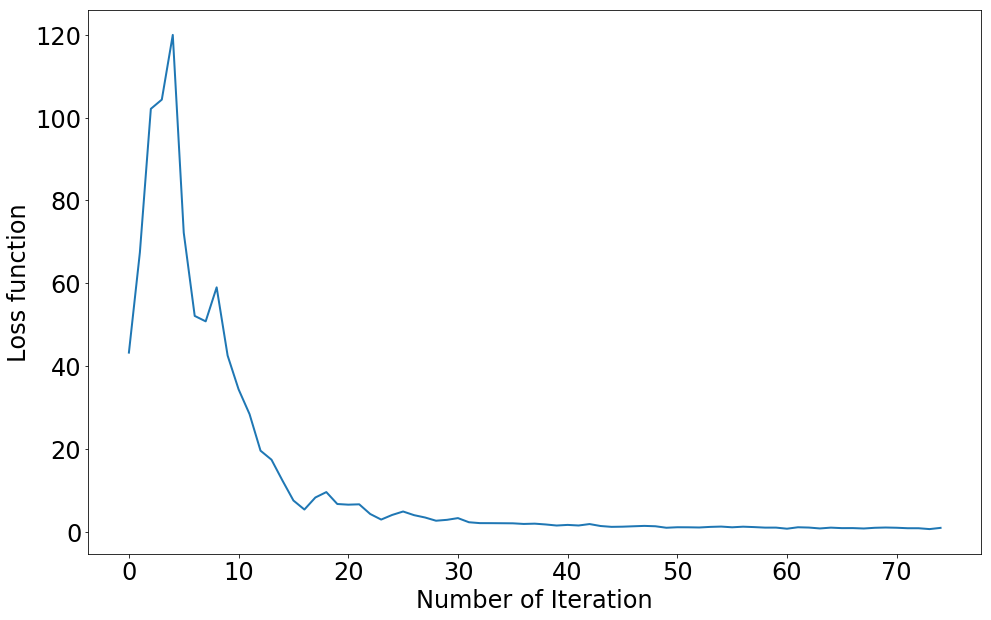

In [54]:
net = Net(input_size, hidden_size, num_classes)
MSE = nn.MSELoss()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

history = np.array([])
errors = np.array([])
for i, (images, labels) in enumerate(train_loader):   # Загрузка партии изображений с индексом, данными, классом
    images = Variable(images.view(-1, 28 * 28))         # Конвертация тензора в переменную: изменяем изображение с вектора, размером 784 на матрицу 28 x 28
    labels = Variable(labels)

    optimizer.zero_grad()                             # Инициализация скрытых масс до нулей
    outputs = net(images)                             # Передний пропуск: определение выходного класса, данного изображения
    loss = criterion(outputs, labels)                 # Определение потерь: разница между выходным классом и предварительно заданной меткой
    loss.backward()                                   # Обратный проход: определение параметра weight
    optimizer.step()                                  # Оптимизатор: обновление параметров веса в скрытых узлах
    history = np.append(history, loss.data.numpy())
    
    error = np.array([])
    for i, (images_test, labels_test) in enumerate(test_loader):
        images_test = Variable(images_test.view(-1, 28 * 28))
        labels_test = Variable(labels_test)
        error = np.append(error, MSE(torch.argmax(net(images_test).data, 1).type(torch.FloatTensor), labels_test.type(torch.FloatTensor)).numpy())
    errors = np.append(errors, np.mean(error))
# Plotting
fig = plt.figure(figsize=(16,10))
plt.xlabel('Number of Iteration')
plt.ylabel('Mean Squared Error in test data')
plt.plot(errors)
plt.show()
fig = plt.figure(figsize=(16,10))
plt.xlabel('Number of Iteration')
plt.ylabel('Loss function')
plt.plot(history)
plt.show()

#### 3. Для разных объемов выборки построить графики кривой обучения, показывающие различные скорости обучения.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


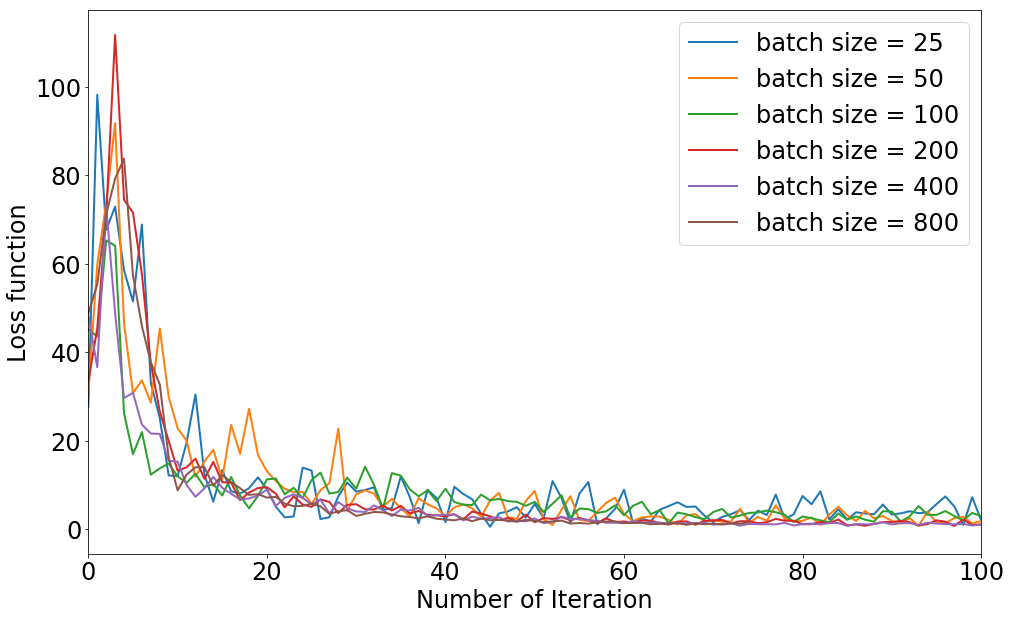

In [69]:
batch_sizes = [25, 50, 100, 200, 400, 800]
fig = plt.figure(figsize=(16,10))
plt.xlabel('Number of Iteration')
plt.ylabel('Loss function')
plt.xlim(0, 100)
for batch_size in batch_sizes:
    train_loader = DataLoader(
        dataset = list(zip(X_tensor_train, y_tensor_train)),
        batch_size=batch_size,
        shuffle=True
    )
    net = Net(input_size, hidden_size, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

    history = np.array([])
    for i, (images, labels) in enumerate(train_loader):   # Загрузка партии изображений с индексом, данными, классом
        images = Variable(images.view(-1, 28 * 28))         # Конвертация тензора в переменную: изменяем изображение с вектора, размером 784 на матрицу 28 x 28
        labels = Variable(labels)

        optimizer.zero_grad()                             # Инициализация скрытых масс до нулей
        outputs = net(images)                             # Передний пропуск: определение выходного класса, данного изображения
        loss = criterion(outputs, labels)                 # Определение потерь: разница между выходным классом и предварительно заданной меткой
        loss.backward()                                   # Обратный проход: определение параметра weight
        optimizer.step()                                  # Оптимизатор: обновление параметров веса в скрытых узлах
        history = np.append(history, loss.data.numpy())
    # Plotting
    plt.plot(history, label = 'batch size = %s' % batch_size)
plt.legend()
plt.show()

## Вывод
Величина выборки практически не влияет на скорость обучения.

#### 4.Наложить на выборку шум. Например, перемешать независимые переменные или добавить случайный шум в зависимые, на ваш выбор. Построить несколько графиков кривой обучения в условиях наложенного шума с разной дисперсией.

Т.к. данные являются массивом (28, 28) пикселей, принимающих дискретные значения от 0 до 255, то в качестве шума будем использовать массив, заполненный элементами, которые распределены по натуральному распределению с мат ожиданием 255 / 5 = 51 и дисперсией 20.
P.S. Значение мат ожидания и дисперсии взято произвольное. В последствие согласно заданию дисперсия будет изменяться

#### Пример данных без шума и с шумом.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


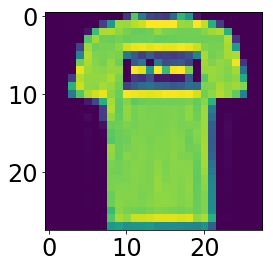

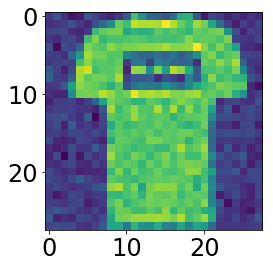

In [119]:
X_tensor_train_noise = torch.FloatTensor(X_train + np.random.normal(np.max(X_train[0]) / 5, 20, X_train[0].shape))
plt.imshow(X_tensor_train[1])
plt.show()
plt.imshow(X_tensor_train_noise[1])
plt.show()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


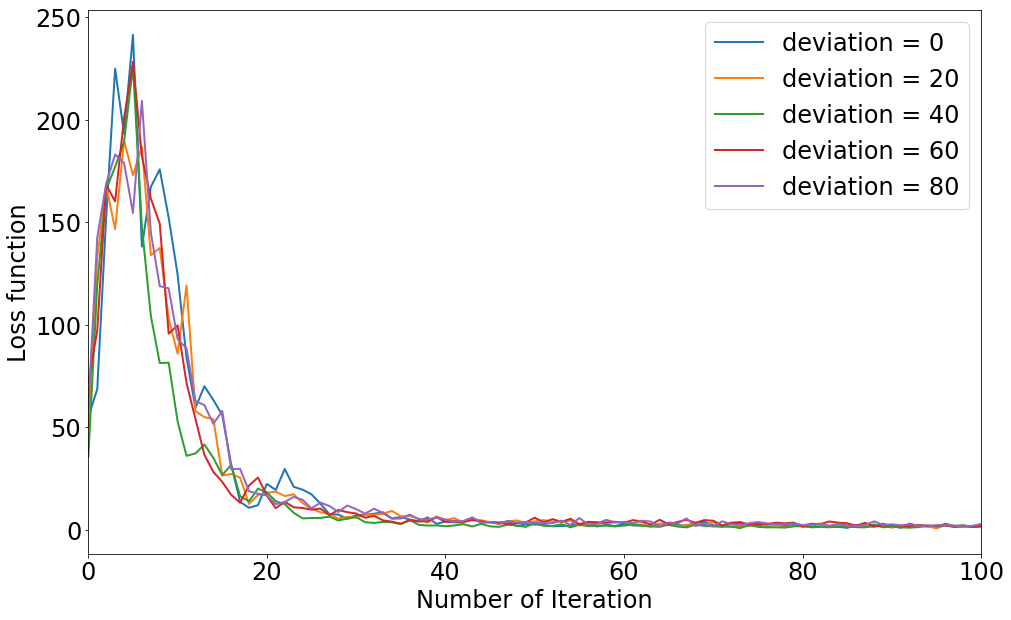

In [140]:
deviations = np.arange(0, 100, 20)
fig = plt.figure(figsize=(16,10))
plt.xlabel('Number of Iteration')
plt.ylabel('Loss function')
plt.xlim(0, 100)
batch_size = 100

for deviation in deviations:
    X_tensor_train_noise = torch.FloatTensor(X_train + np.random.normal(np.max(X_train[0]) / 5, deviation, X_train[0].shape))
    train_loader = DataLoader(
        dataset = list(zip(X_tensor_train_noise, y_tensor_train)),
        batch_size=batch_size,
        shuffle=True
    )
    net = Net(input_size, hidden_size, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

    history = np.array([])
    for i, (images, labels) in enumerate(train_loader):   # Загрузка партии изображений с индексом, данными, классом
        images = Variable(images.view(-1, 28 * 28))         # Конвертация тензора в переменную: изменяем изображение с вектора, размером 784 на матрицу 28 x 28
        labels = Variable(labels)

        optimizer.zero_grad()                             # Инициализация скрытых масс до нулей
        outputs = net(images)                             # Передний пропуск: определение выходного класса, данного изображения
        loss = criterion(outputs, labels)                 # Определение потерь: разница между выходным классом и предварительно заданной меткой
        loss.backward()                                   # Обратный проход: определение параметра weight
        optimizer.step()                                  # Оптимизатор: обновление параметров веса в скрытых узлах
        history = np.append(history, loss.data.numpy())
    # Plotting
    plt.plot(history, label = 'deviation = %s' % deviation)
plt.legend()
plt.show()

## Вывод
Величина дисперсии шума практически не влияет на скорость обучения.

## Благодарности
Большую благодарность за мотивацию к раннему выполнению данного задания, а также за содействие в решении и обсуждении различного рода проблем, хочется выразить Каныгину Юре, Макрополо Юре и Грибовой Ольге.
Также выражаю свою благодарность сайту https://python-scripts.com/build-neural-network, откуда была позаимствована основная идея создания данной нейроной сети.